<h1>Project: United Kingdom Road Accident Data Analysis</h1>
<h2>Inclusive Years: 2019 - 2022</h2>
<H3>Analyst: Ken Ford M. Mustapha</H3>

<h1>Data Preperation</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')


In [3]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [4]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unacounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unacounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unacounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [7]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
#column
#date
#just in case errors appears
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors='coerce')

In [9]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [10]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [11]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [12]:
    accident['Year'] = accident['Accident Date'].dt.year
    accident['Month'] = accident['Accident Date'].dt.month
    accident['Day'] = accident['Accident Date'].dt.day
    accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

<h1>UniVariate</h1>

In [13]:
accident['Accident Date'].value_counts()

Accident Date
2019-11-30    704
2019-01-31    697
2019-07-13    692
2021-11-13    692
2019-08-14    688
             ... 
2022-12-30    171
2019-12-25    157
2022-12-25    145
2022-01-10    123
2020-12-25    118
Name: count, Length: 1461, dtype: int64

In [14]:
df2019 = accident[accident['Year'] == 2019]

In [15]:
df2020 = accident[accident['Year'] == 2020]

In [16]:
df2021 = accident[accident['Year'] == 2021]

In [17]:
df2022= accident[accident['Year'] == 2022]

<h1>Insight No.1</h1>
<h2>Daylight Constitute to 132% of the total accident from year 2019</h2>

In [18]:
df2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h1>Insight no.2</h1>
<h2>Question How Many Incident Happened Under Daylight in 2019</h2>

In [19]:
df2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h1>There are 133042 number of accident happen in 2019 </h1>

<h1>Insight no.3</h1>
<h2>Accident severity in the month of January in 2019</h2>

In [20]:
month_year = df2019[df2019['Month'] == 1]

In [21]:
month_year

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
22,200701BS70001,Slight,2019-01-18,51.499983,Darkness - lights lit,Kensington and Chelsea,-0.179933,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,18,4
23,200701BS70002,Serious,2019-01-22,51.485674,Daylight,Kensington and Chelsea,-0.150543,2,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,22,1
24,200701BS70003,Serious,2019-01-17,51.498157,Daylight,Kensington and Chelsea,-0.201473,1,1,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2019,1,17,3
25,200701BS70004,Slight,2019-01-03,51.493311,Darkness - lights lit,Kensington and Chelsea,-0.190427,2,1,Wet or damp,Single carriageway,Urban,Other,Car,2019,1,3,3
26,200701BS70005,Slight,2019-01-02,51.498060,Daylight,Kensington and Chelsea,-0.166178,1,1,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181974,2.01E+12,Slight,2019-01-23,55.197742,Daylight,Dumfries and Galloway,-3.410764,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,1,23,2
181975,2.01E+12,Serious,2019-01-23,55.332789,Daylight,Dumfries and Galloway,-3.443778,1,1,Wet or damp,Single carriageway,Rural,Snowing no high winds,Car,2019,1,23,2
181976,2.01E+12,Slight,2019-01-28,54.984731,Darkness - no lighting,Dumfries and Galloway,-3.166207,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2019,1,28,0
181977,2.01E+12,Serious,2019-01-28,54.994760,Darkness - no lighting,Dumfries and Galloway,-3.224804,1,1,Dry,Single carriageway,Rural,Fine no high winds,Motorcycle over 125cc and up to 500cc,2019,1,28,0


In [22]:
month_year = df2019['Accident_Severity'].value_counts().sort_index()

In [23]:
month_year

Accident_Severity
Fatal        2714
Serious     24322
Slight     155079
Name: count, dtype: int64

<h1>There are more Slight Accident_Severity in the month of january in 2019</h1>

<h1>Insight no.4</h1>
<h2>how many Serious Accident in one way street</h2>

In [24]:
accident[(accident['Accident_Severity'] == 'Serious') & (accident['Road_Type'] == 'One way street')].shape[0]

1655

<h1>There are 1655 Serious Accident in One Way Street</h1>

<h1>Insight no.5</h1>
<h2>Which road types more dangerous at night?</h2>

In [25]:
light_condition_road = df2019.groupby(['Road_Type', 'Light_Conditions']).size().unstack()

In [26]:
light_condition_road

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Road_Type,,,,,
Dual carriageway,256,5678,119,2193,19916
One way street,34,946,24,32,2777
Roundabout,108,2847,44,57,8642
Single carriageway,1253,25715,493,8400,99037
Slip road,29,371,6,101,1467
unacounted,88,212,8,59,1203


<h1>Single Carriageway is more dangerous at night</h1>

<h1>Insgiht no.6</h1>
<h2>is There a correlation between Latitude and Longhitude</h2>

In [27]:
insight = accident['Latitude'].corr(accident['Longitude'])

In [28]:
insight

np.float64(-0.3981137948101014)

<h1>there is a correlation between Latitude and Longhitude</h1>

<h1>Insight no.7</h1>
<h2>is There a correlation between Number_of_Casualties and Number_of_Vehicles</h2>

In [29]:
ncasualties_n = accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])

In [30]:
ncasualties_n

np.float64(0.2288888612692756)

<h1>There is no Correlation Between Number_of_Casualties and  Number_of_Vehicles</h1>

<h1>Insight no.8</h1>
<h2>What Year has the Highest Accident Severity</h2>

In [31]:
severity_date = accident.groupby(['Year', 'Accident_Severity']).size().unstack()

In [32]:
severity_date

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


<h1>Year 2019 Has the Highest Severity recorded</h1>

<h1>Insight no.9</h1>
<h2>Which vehicle type has the highest Accident Record</h2>

In [33]:
vehicle_severity = df2019.groupby(['Vehicle_Type', 'Accident_Severity']).size().unstack()

In [34]:
vehicle_severity

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,7,103,526
Bus or coach (17 or more pass seats),152,1396,8935
Car,1948,17469,110887
Data missing or out of range,0,0,0
Goods 7.5 tonnes mgw and over,106,819,5322
Goods over 3.5t. and under 7.5t,26,285,1738
Minibus (8 - 16 passenger seats),11,86,528
Motorcycle 125cc and under,76,544,3693
Motorcycle 50cc and under,35,270,1831


<h1>Car has the highest record in accident</h1>

<h1>Insight no.10</h1>
<h2>Which Month has the highest accident in the year 2021</h2>

In [35]:
monthly_accidents = df2021['Month'].value_counts().sort_index()

In [36]:
monthly_accidents

Month
1     13417
2     10950
3     13202
4     12715
5     13811
6     13936
7     14300
8     13415
9     13792
10    14834
11    15473
12    13709
Name: count, dtype: int64

<h1>month of nevember has the highesst accident in 2021</h1>

In [37]:
df2021 = accident[accident['Year'] == 2021]

In [38]:
df2021

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021,1,1,4
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,1,5,1
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,1,4,0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021,1,5,1
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516255,2.01E+12,Serious,2021-12-15,55.072192,Darkness - no lighting,Dumfries and Galloway,-3.297647,1,5,Dry,Dual carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2021,12,15,2
516256,2.01E+12,Serious,2021-12-20,55.008460,Darkness - lights lit,Dumfries and Galloway,-3.088242,1,1,Frost or ice,Slip road,Rural,Fine no high winds,Car,2021,12,20,0
516257,2.01E+12,Slight,2021-12-23,54.995302,Daylight,Dumfries and Galloway,-3.259680,1,1,Frost or ice,Single carriageway,Rural,Snowing + high winds,Motorcycle over 125cc and up to 500cc,2021,12,23,3
516258,2.01E+12,Slight,2021-12-21,55.120172,Darkness - lights lit,Dumfries and Galloway,-3.356438,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021,12,21,1


<h1>Insight no.11</h1>
<h2>How many Fatal Accident happen in 2021</h2>

In [39]:
df2021[(df2021['Accident_Severity'] == 'Fatal') & (df2021['Road_Type'] == 'One way street')].shape[0]

25

<h1>There are 25 Fatal accident happen in 2021</h1>

<h1>Insight no.12</h1>
<h2>What day has the most accident in year 2021</h2>

In [40]:
df2021['Day'].value_counts()

Day
6     5712
11    5710
21    5690
2     5655
10    5629
12    5613
17    5556
9     5543
20    5531
16    5511
24    5510
13    5484
1     5435
3     5428
23    5425
5     5417
8     5382
27    5377
4     5327
7     5321
14    5308
19    5302
15    5158
28    5101
18    5092
22    5083
26    4961
30    4953
25    4773
29    4671
31    2896
Name: count, dtype: int64

In [41]:
day = df2021[df2021['Day'] == 1]

In [42]:
day

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021,1,1,4
352711,200901BS70006,Slight,2021-01-01,51.493415,Daylight,Kensington and Chelsea,-0.185525,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,1,1,4
352799,200901BS70120,Slight,2021-03-01,51.484361,Daylight,Kensington and Chelsea,-0.175802,1,2,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2021,3,1,0
352831,200901BS70155,Slight,2021-04-01,51.493723,Daylight,Kensington and Chelsea,-0.182199,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,4,1,3
352845,200901BS70172,Slight,2021-04-01,51.492747,Darkness - lights lit,Kensington and Chelsea,-0.200533,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516188,2.01E+12,Serious,2021-06-01,55.159295,Darkness - no lighting,Dumfries and Galloway,-3.385705,2,2,Dry,Dual carriageway,Rural,Fine no high winds,Bus or coach (17 or more pass seats),2021,6,1,1
516189,2.01E+12,Slight,2021-06-01,55.116800,Daylight,Dumfries and Galloway,-3.483800,1,2,Dry,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2021,6,1,1
516224,2.01E+12,Slight,2021-09-01,55.127244,Daylight,Dumfries and Galloway,-3.459877,2,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2021,9,1,2
516247,2.01E+12,Slight,2021-12-01,55.115346,Darkness - no lighting,Dumfries and Galloway,-3.409426,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021,12,1,2


<h1>Insight no.13</h1>
<h2>Which road type has the most serious accidents in year?</h2>

In [43]:
severity_road_type = df2022.groupby(['Road_Type', 'Accident_Severity']).size().unstack()

In [44]:
severity_road_type

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,361,2492,18562
One way street,12,353,2561
Roundabout,28,816,9044
Single carriageway,1138,14906,91995
Slip road,9,143,1384
unacounted,1,67,547


<h1>Insight no.14</h1>
<h2>Which has the most accident rural or urban</h2>

In [45]:
urban_severity = df2022.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()

In [46]:
urban_severity

Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,1010,7707,41708
Unallocated,0,0,0
Urban,539,11070,82385


<h1>Insight no.15</h1>
<h2>What is the Average Number of Casualties in Urban vs Rural Areas</h2>

In [47]:
casualties_avg = df2022.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()

In [48]:
casualties_avg

Urban_or_Rural_Area
Rural          1.477164
Unallocated         NaN
Urban          1.289987
Name: Number_of_Casualties, dtype: float64

<h1>Insight no.17</h1>

<h1>What is the Average Vehicle Involvement in Urban and Rural Areas</h1>

In [49]:
vehicles_avg = df2020.groupby('Urban_or_Rural_Area')['Number_of_Vehicles'].mean()

In [50]:
vehicles_avg

Urban_or_Rural_Area
Rural          1.857657
Unallocated    2.166667
Urban          1.808875
Name: Number_of_Vehicles, dtype: float64

<h1>Insight no.18</h1>
<h2>Which road type has the most serious accidents?</h2>

In [51]:
severity_road_type = df2020.groupby(['Road_Type', 'Accident_Severity']).size().unstack()

In [52]:
severity_road_type

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,494,3124,22177
One way street,27,452,3070
Roundabout,38,930,10397
Single carriageway,1758,18279,106596
Slip road,12,174,1647
unacounted,12,162,1242


<h1>Insight no.19</h1>
<h2>Total number of accidents in Urban vs. Rural areas</h2>

In [53]:
urban_rural_counts = df2020['Urban_or_Rural_Area'].value_counts()

In [54]:
urban_rural_counts

Urban_or_Rural_Area
Urban          108594
Rural           61991
Unallocated         6
Name: count, dtype: int64

<h1>Insight no.20</h1>
<h2>How many Serious and number of accident happened in District of Teesdale</h2>

In [55]:
urban_rural_severity = accident[accident['District Area'] == 'Teesdale']
total_accidents = urban_rural_severity.shape[0]
severity_counts = urban_rural_severity['Accident_Severity'].value_counts()

<h1>Year 2021</h1>

In [56]:
urban_rual_severity = df2021[df2021['District Area'] == 'Teesdale']
Total_accidents = urban_rual_severity.shape[0]
severity_counts = urban_rual_severity['Accident_Severity'].value_counts()

In [57]:
Total_accidents

15

In [58]:
severity_counts

Accident_Severity
Slight     13
Serious     2
Fatal       0
Name: count, dtype: int64

In [59]:
df2021.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [60]:
df2021['Accident_Severity'].value_counts()

new_df = df2021[df2021['Accident_Severity'] != 'Slight']

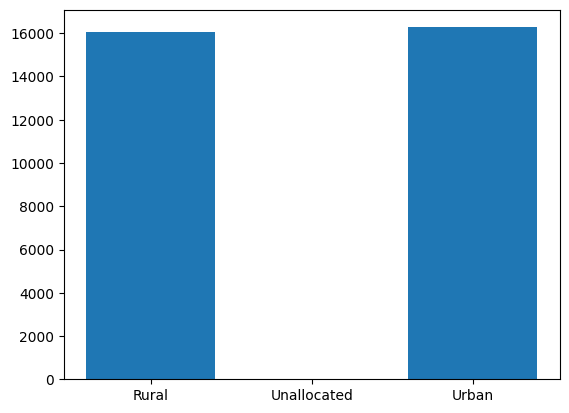

In [61]:
visual = new_df.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

x = visual['Urban_or_Rural_Area']
y = visual['Number_of_Casualties']

plt.bar(x,y)
plt.show()

<h1>Area Analysis</h1>

In [62]:
area_year = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')

pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')
pivot_table


District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


<h1>Creating a line plot</h1>

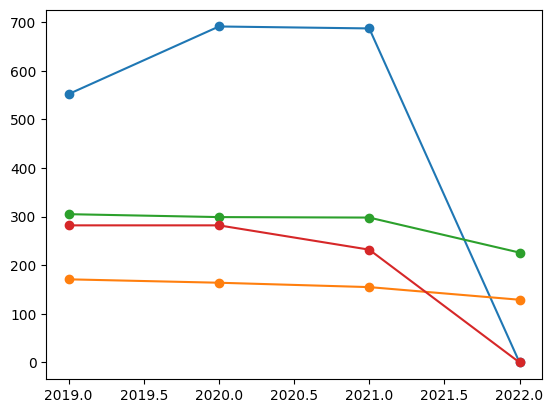

In [63]:
plt.plot(pivot_table.index,pivot_table['Aberdeenshire'], label = 'Aberdeenshire', marker='o')
plt.plot(pivot_table.index,pivot_table['Adur'], label = 'Adur', marker='o')
plt.plot(pivot_table.index,pivot_table['Allerdale'], label = 'Allerdale', marker='o')
plt.plot(pivot_table.index,pivot_table['Angus'], label = 'Angus', marker='o')
plt.show()

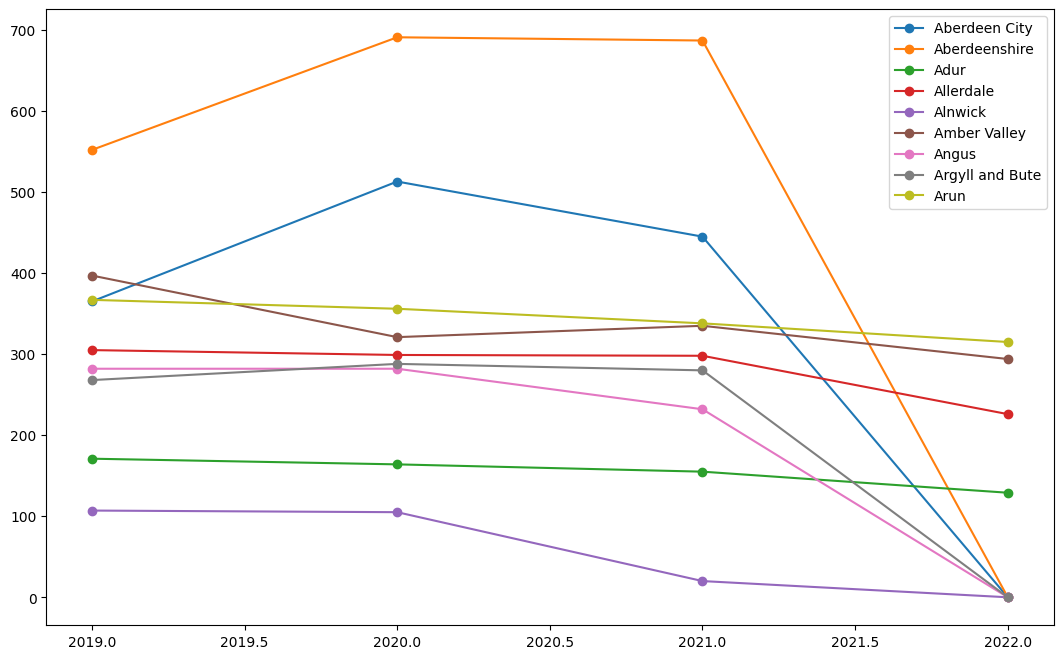

In [64]:
count = 11
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker='o')
    if count == 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

<h1>Visualizing Correlation</h1>

In [65]:
# cas_road = accident.groupby(['Road_Type'])['Number_of_Casualties'].mean()

# cas_road

# sns.heatmap(cas_road)
# plt.show()

<h1>USE for Categorical Relationships</h1>

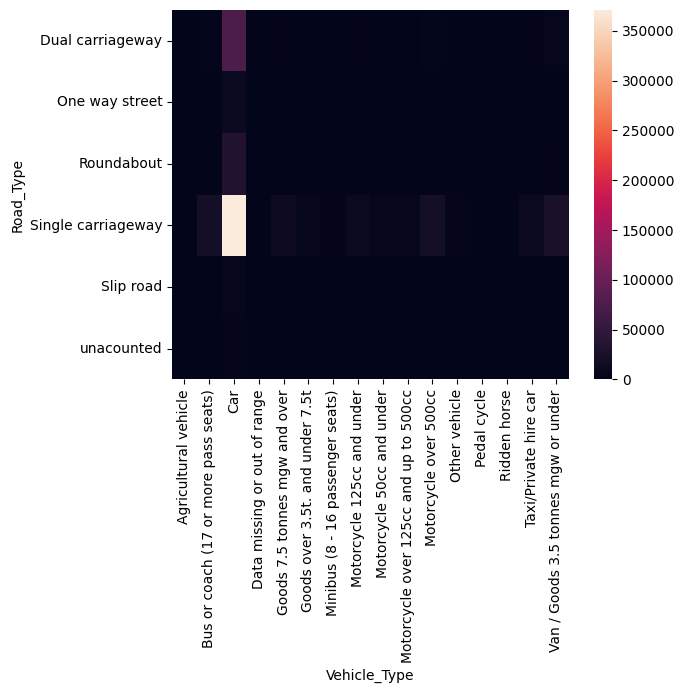

In [66]:
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()

sns.heatmap(type_vh)
plt.show()

<h1>INSIGHT ACCORDING TO THE PREVIOUS INSIGHT</h1>

<h1>1. Insight no.2</h1>
<h2>Question How Many Incident Happened Under Daylight in 2019</h2>

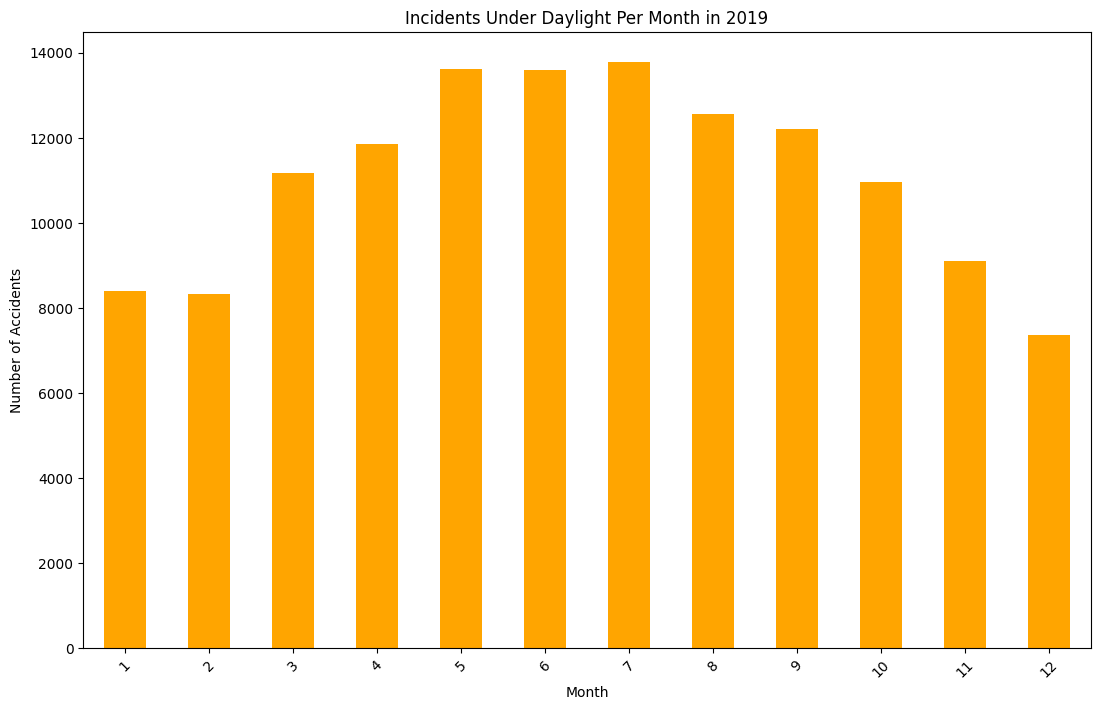

Total Incidents Under Daylight in 2019: 133042


In [67]:

daylight_2019 = df2019[(df2019['Accident Date'].dt.year == 2019) & (df2019['Light_Conditions'] == 'Daylight')]


accident_permonth = daylight_2019.groupby(['Month']).size()


accident_permonth.plot(kind='bar', color='orange')


plt.title('Incidents Under Daylight Per Month in 2019')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.xticks(rotation=45)
plt.show()

total_incidents = daylight_2019.shape[0]
print(f"Total Incidents Under Daylight in 2019: {total_incidents}")


<h1>Ther are 133042 Incidents Under Daylight in 2019</h1>

<h1>2. Insight no.4</h1>
<h2>how many Serious Accident in one way street in year 2021</h2>

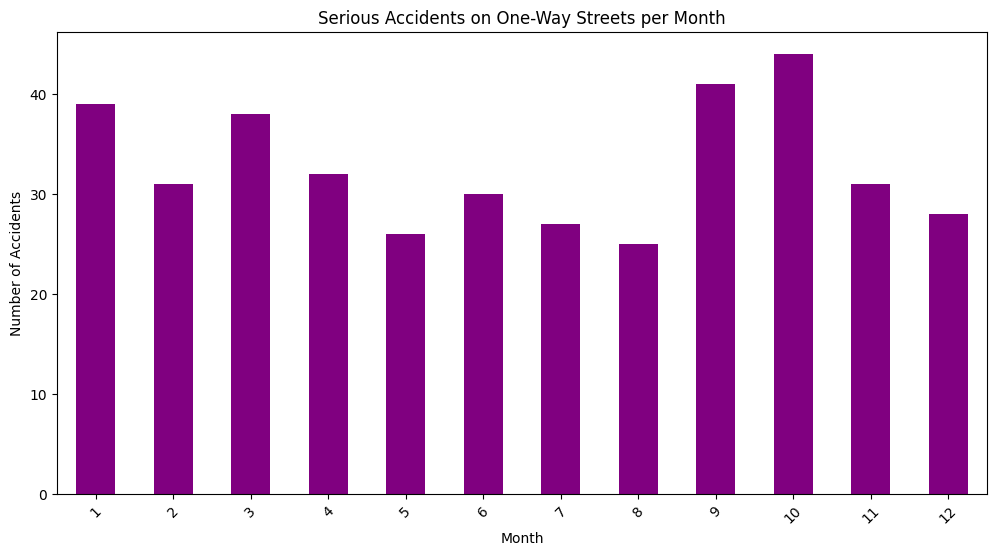

Total Serious Accidents on One-Way Streets: 392


In [68]:

serious_oneway = df2021[(df2021['Accident_Severity'] == 'Serious') & (df2021['Road_Type'] == 'One way street')]

serious_oneway_permonth = serious_oneway.groupby(['Month']).size()

plt.figure(figsize=(12, 6))
serious_oneway_permonth.plot(kind='bar', color='purple')

plt.title('Serious Accidents on One-Way Streets per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


total_serious_oneway = serious_oneway.shape[0]
print(f"Total Serious Accidents on One-Way Streets: {total_serious_oneway}")

<h1>There are 392 Serious Accidents on One-Way Street in year 2021</h1>

<h1>3.. Insight no.5</h1>
<h2>Which road types more dangerous at night?</h2>

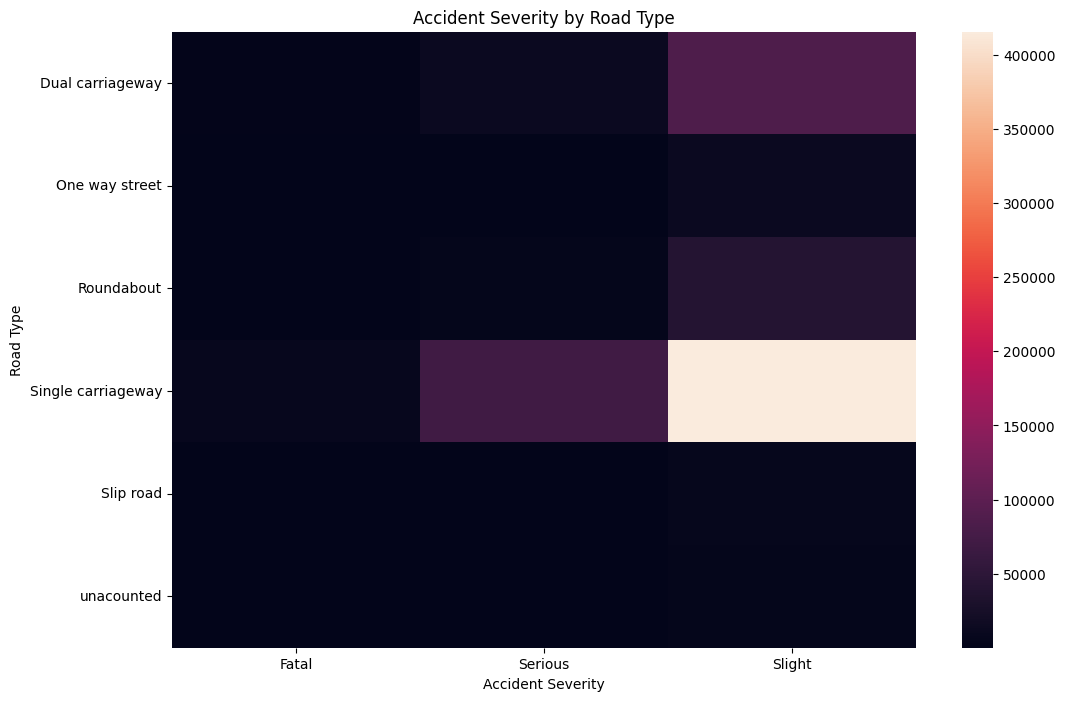

In [69]:
severity_road = accident.groupby(['Road_Type', 'Accident_Severity']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(severity_road)

plt.title('Accident Severity by Road Type')
plt.xlabel('Accident Severity')
plt.ylabel('Road Type')

plt.show()

<h1>4. Insight no.9</h1>
<h2>Which vehicle type has the highest Accident Record Over the year</h2>

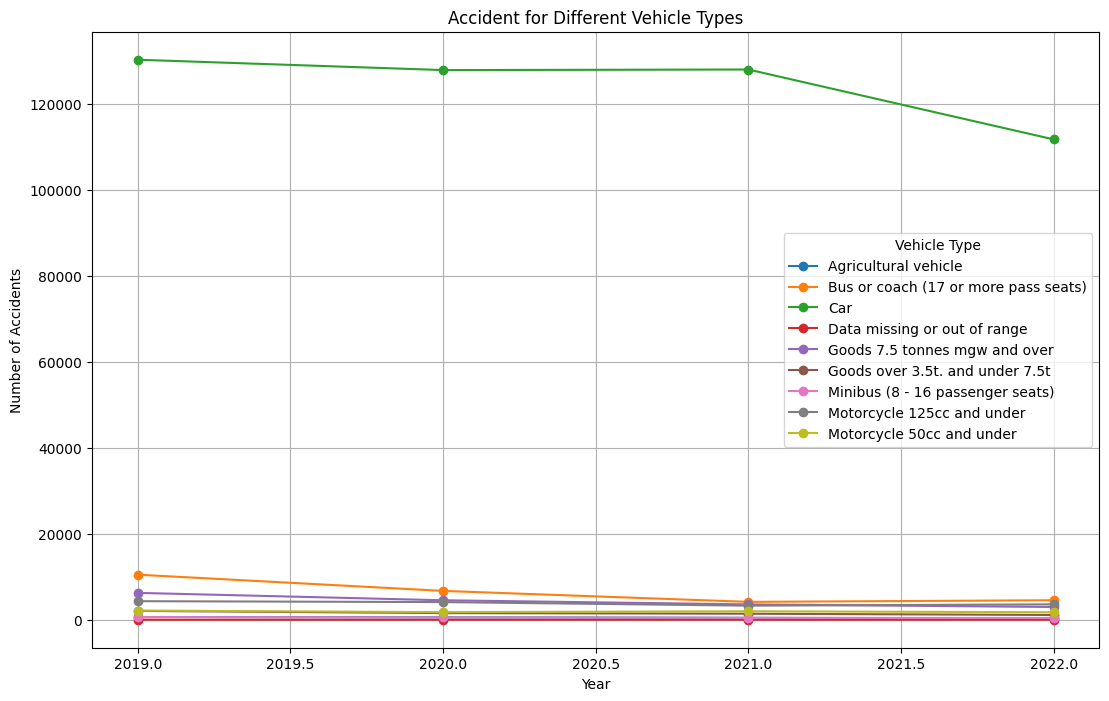

In [70]:

vehicle_year = accident.groupby(['Vehicle_Type', 'Year']).size().reset_index(name='Accident_Count')

pivot_table = vehicle_year.pivot(index='Year', columns='Vehicle_Type', values='Accident_Count')


count = 11  


for vehicle in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[vehicle], label=vehicle, marker='o')
    
    if count == 20: 
        break


plt.gcf().set_size_inches(13, 8)
plt.title('Accident for Different Vehicle Types')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title="Vehicle Type")
plt.grid(True)


plt.show()

<h1>Car vehicle has the highest accidnet record over the year</h1>


<h1>5. Insight no.10</h1>
<h2>Which Month has the highest accident in the year 2021</h2>

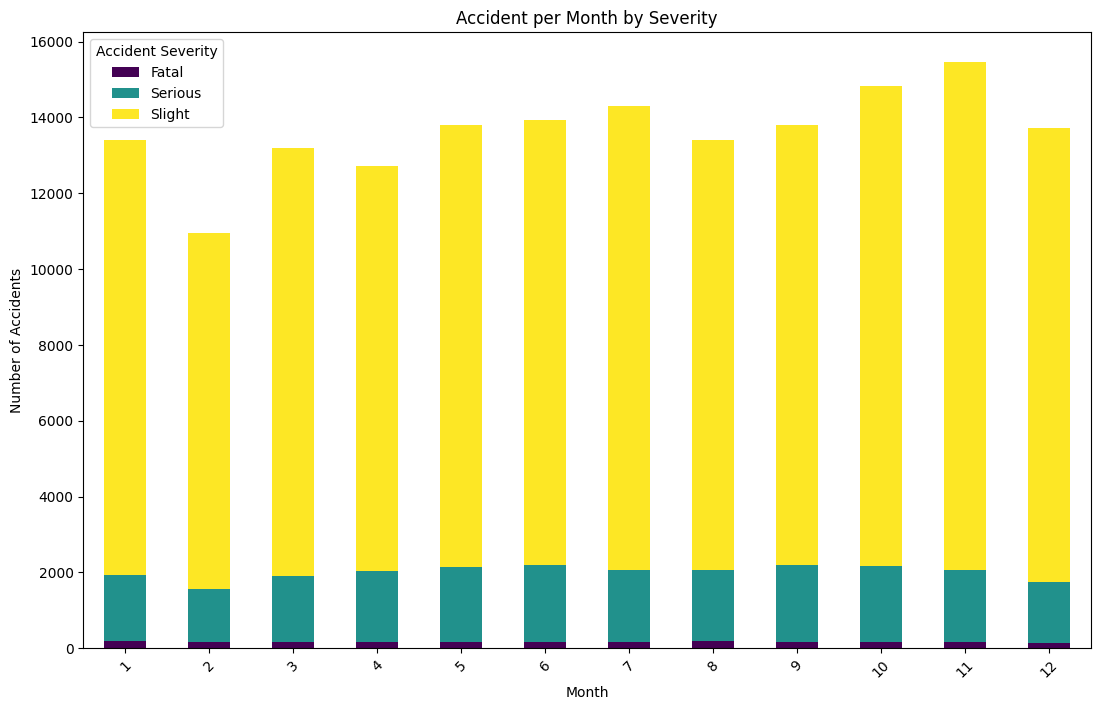

In [71]:
accident_permonth = df2021.groupby(['Month', 'Accident_Severity']).size().unstack()


accident_permonth.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Accident per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")
plt.show()



<h1>Month of november has the highest accident in year 2021</h1>

<h1>6. Insight no.11</h1>
<h2>How many Fatal Accident happen in 2021</h2>

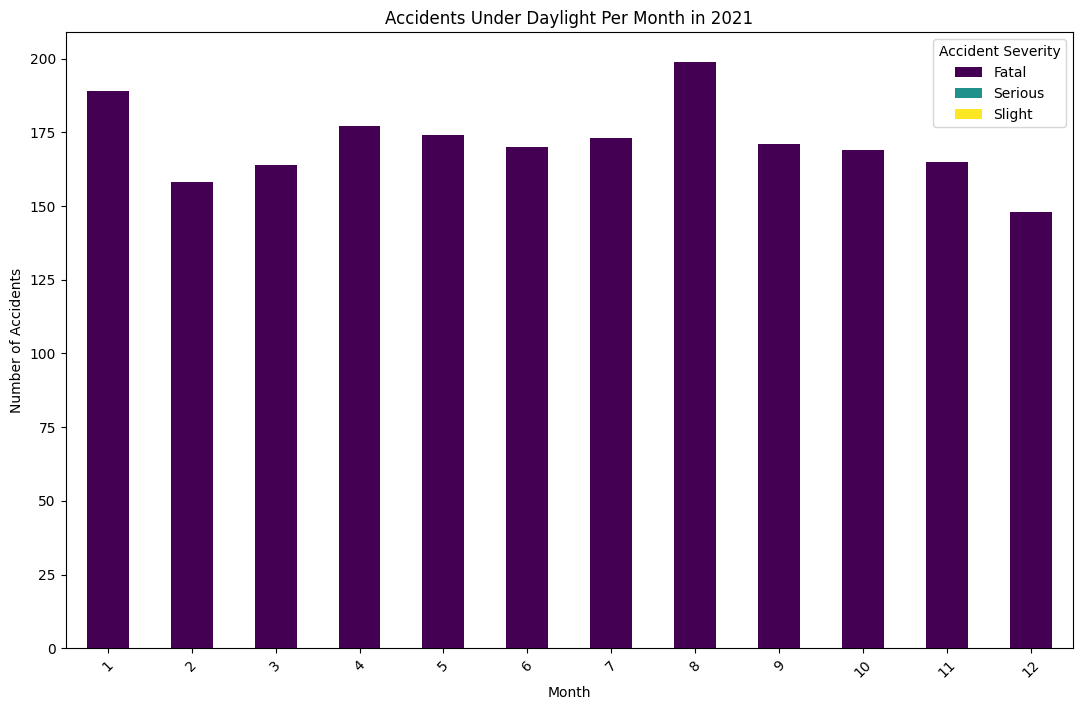

Total Fatal Accident in 2021: 2057


In [72]:

fatal_2021 = df2021[(df2021['Accident_Severity'] == 'Fatal')]

accident_permonth = fatal_2021.groupby(['Month', 'Accident_Severity']).size().unstack()


accident_permonth.plot(kind='bar', stacked=True, colormap='viridis')


plt.title('Accidents Under Daylight Per Month in 2021')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")

plt.show()


total_incidents = fatal_2021.shape[0]
print(f"Total Fatal Accident in 2021: {total_incidents}")

<h1>There are 2057 Fatal Accident in 2021</h1>

<h1>7. Insight no.12</h1>
<h2>What day has the most accident in year 2021</h2>

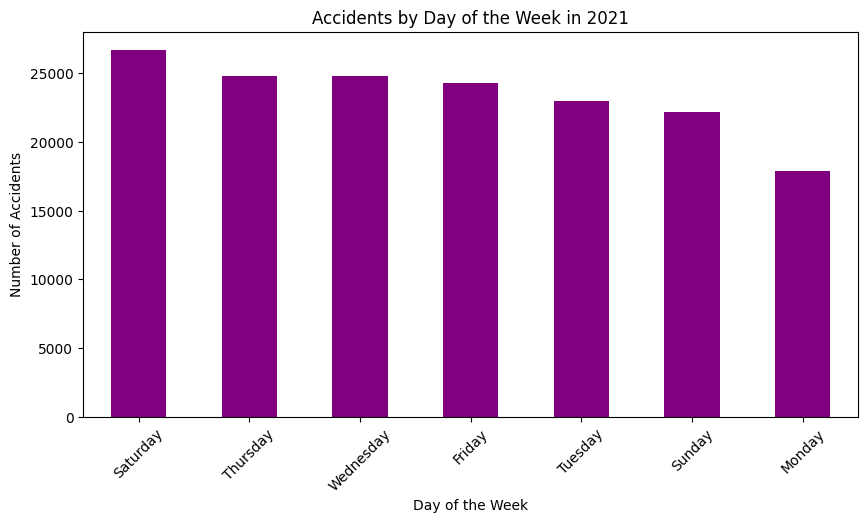

In [73]:
df2021['Accident Date'] = pd.to_datetime(df2021['Accident Date'], dayfirst=True)
df2021['Day_of_Week'] = df2021['Accident Date'].dt.day_name()

accidents_by_day = df2021['Day_of_Week'].value_counts()

accidents_by_day.plot(kind='bar', color='purple', figsize=(10, 5))
plt.title('Accidents by Day of the Week in 2021')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<h1>Saturday Has the most accident in year 2021</h1>


<h1>8. Insight no.13</h1>
<h2>Which road type has the most serious accidents?</h2>

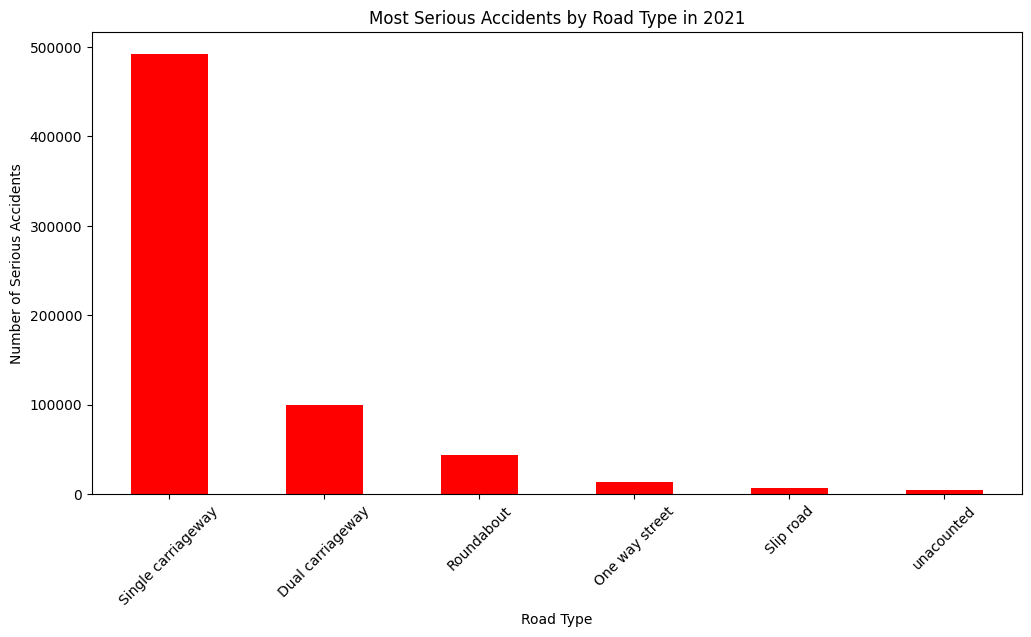

In [74]:

serious_by_roadtype = accident.groupby('Road_Type').size().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
serious_by_roadtype.plot(kind='bar', color='red')

plt.title('Most Serious Accidents by Road Type in 2021')
plt.xlabel('Road Type')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)


plt.show()

<h1>Single carriageway has the most serious accident over the year</h1>

<h1>9. Insight no.14</h1>
<h2>Which has the most accident rural or urban Over the year</h2>

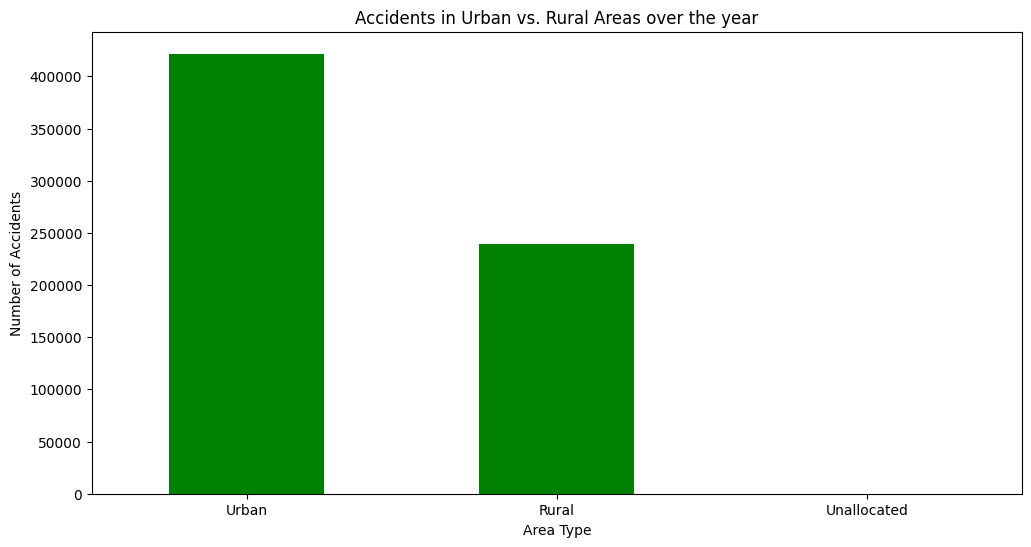

In [75]:
serious_by_area = accident.groupby('Urban_or_Rural_Area').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
serious_by_area.plot(kind='bar', color='green')

plt.title('Accidents in Urban vs. Rural Areas over the year')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

plt.show()

<h1>Urban are has the most accident over the year</h1>

<h1>This insight is note according to the previous insight</h1>

<h1>10. How many fatal accident happen in daylight in year 2019</h1>

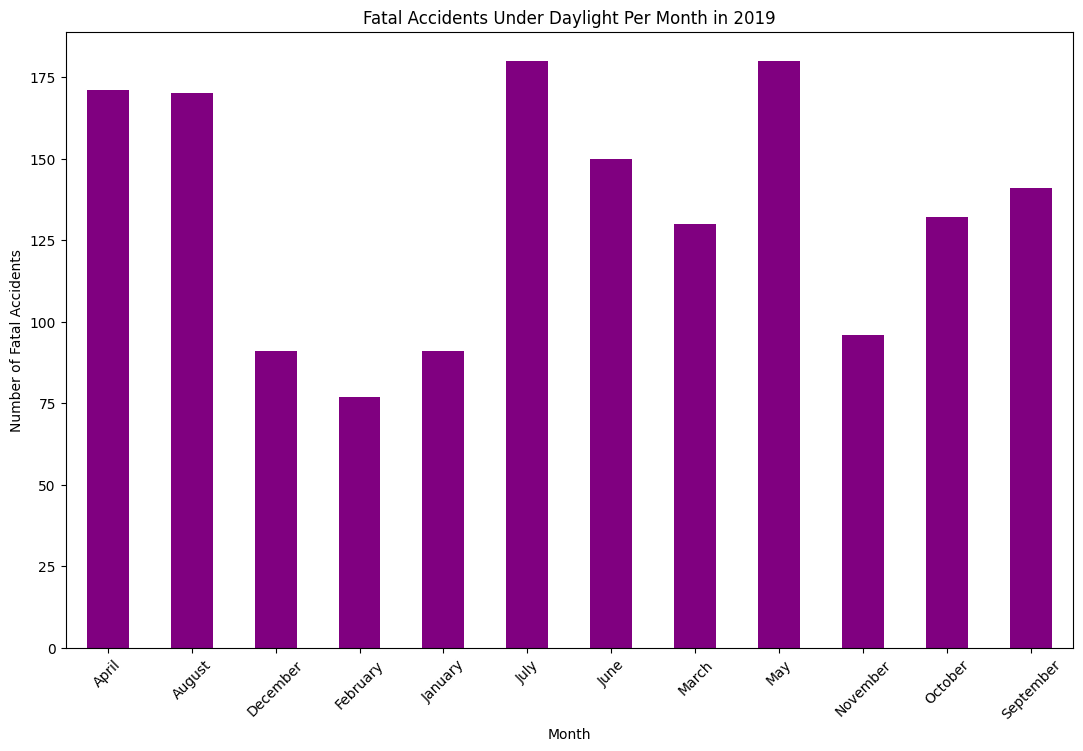

Total Fatal Accident in 2019: 1609


In [76]:

fatal_2019 = df2019[(df2019['Accident_Severity'] == 'Fatal') & (df2019['Light_Conditions'] == 'Daylight')]
    

fatal_2019['Month'] = fatal_2019['Accident Date'].dt.strftime('%B')  # Converts month to name

accident_permonth = fatal_2019.groupby(['Month']).size()


accident_permonth.plot(kind='bar', color='purple')


plt.title('Fatal Accidents Under Daylight Per Month in 2019')
plt.xlabel('Month')
plt.ylabel('Number of Fatal Accidents')
plt.gcf().set_size_inches(13, 8)
plt.xticks(rotation=45)

plt.show()

total_incidents = fatal_2019.shape[0]
print(f"Total Fatal Accident in 2019: {total_incidents}")


<h1>There are 1609 Fatal Accident happen in daylight in year  2019</h1>

<h1>11. Most Dangerous Road Conditions for Different Vehicle over the year</h1>

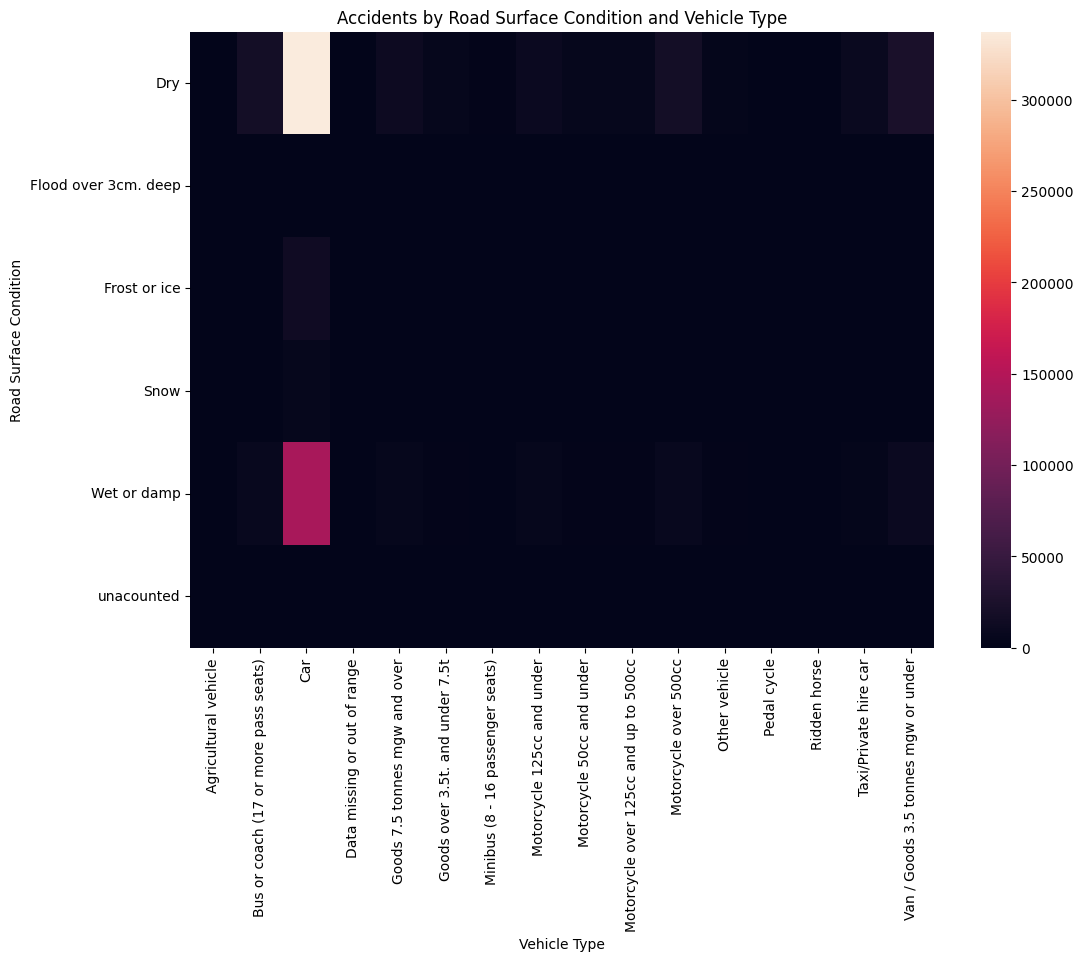

In [77]:
road_surface_vh = accident.groupby(['Road_Surface_Conditions', 'Vehicle_Type']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(road_surface_vh)

plt.title('Accidents by Road Surface Condition and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Road Surface Condition')

plt.show()

<h1>the most dengerous road is dry in car vehicle</h1>

<h1>12. Number of Accidents Per Month in year 2021 </h1>

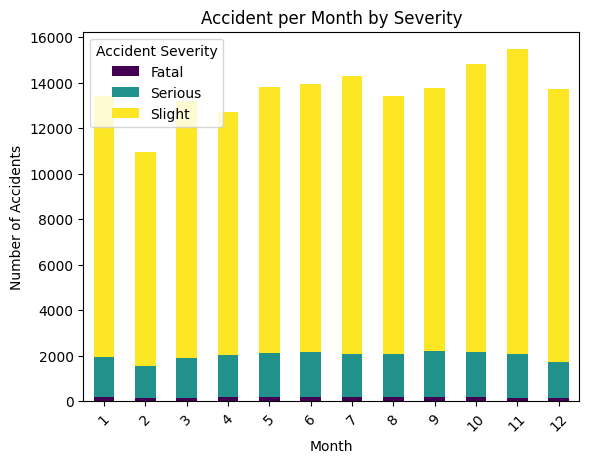

In [78]:
accident_permonth = df2021.groupby(['Month', 'Accident_Severity']).size().unstack()
accident_permonth.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Accident per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")
plt.show()


<h1>13. Do more accidents happen during the day or at night over the year?</h1>

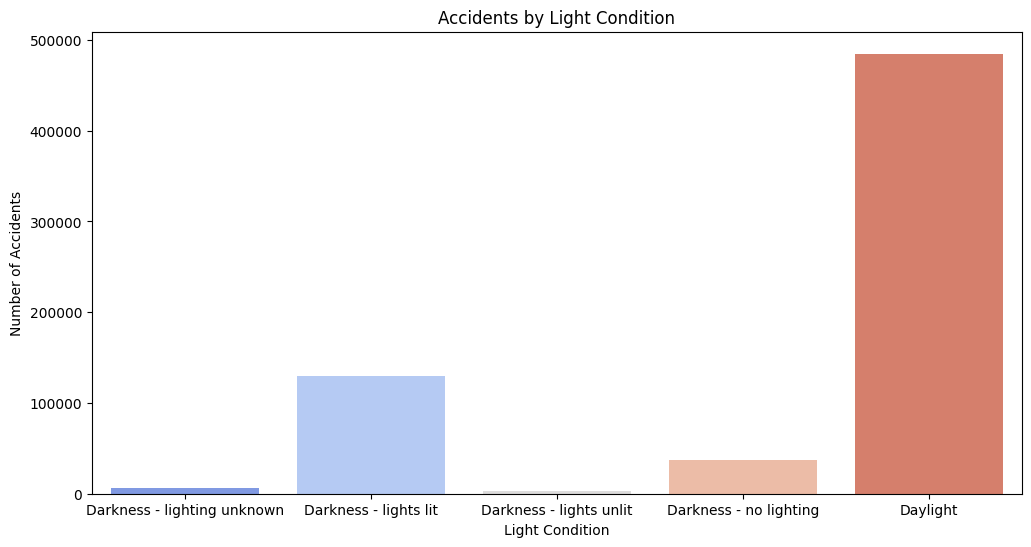

In [79]:
day_night = accident['Light_Conditions'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=day_night.index, y=day_night.values, palette='coolwarm')

plt.title('Accidents by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')

plt.show()


<h1>There more accident happen in daylight</h1>

<h1>14. Accidents by the name start with A letter District Over Years </h1>

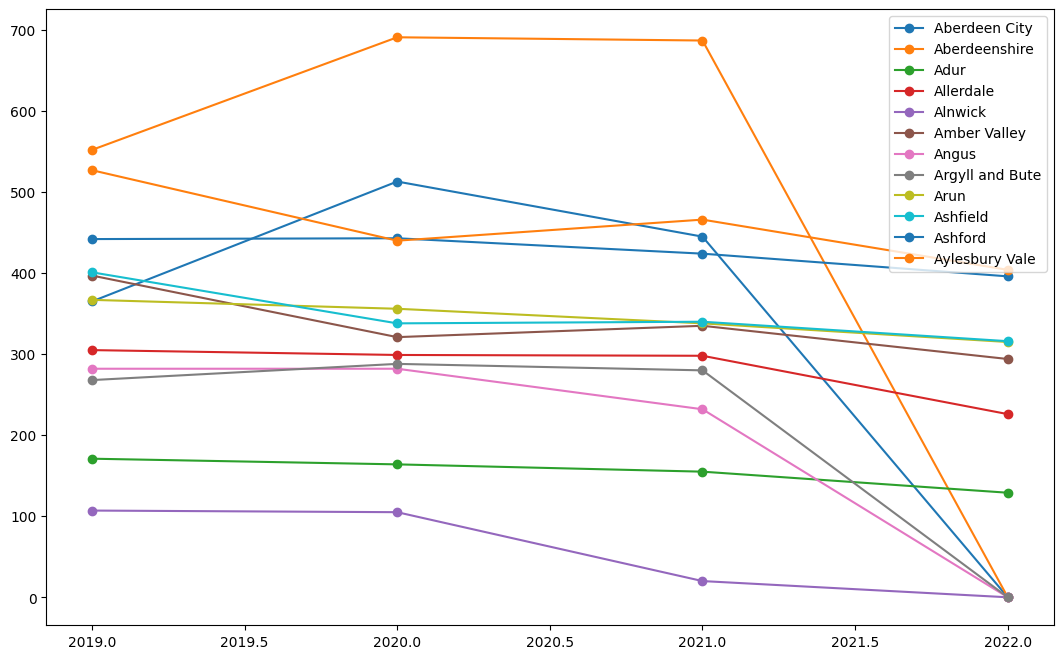

In [80]:
area_year = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')
pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')
count = 11
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker='o')
    if count == 23:
        break
plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()


<h1>15. Occur at Night vs. Day for Each Vehicle Type (Heatmap) over the year?</h1>

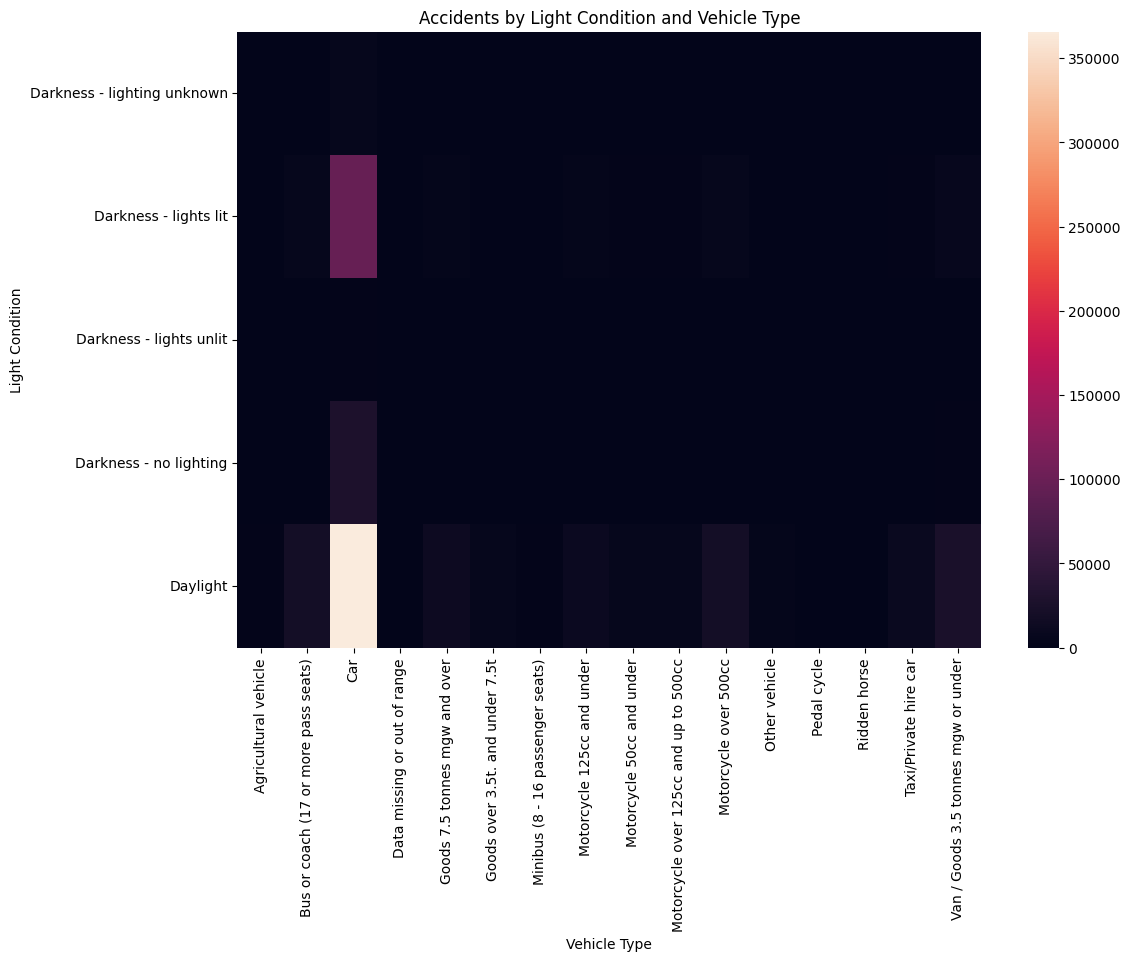

Total Fatal Accident in 2019: 5


In [88]:
light_vh = accident.groupby(['Light_Conditions', 'Vehicle_Type']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(light_vh)

plt.title('Accidents by Light Condition and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Light Condition')

plt.show()




<h1>16. Accidents by Weather Condition & Vehicle Type (Heatmap)</h1>

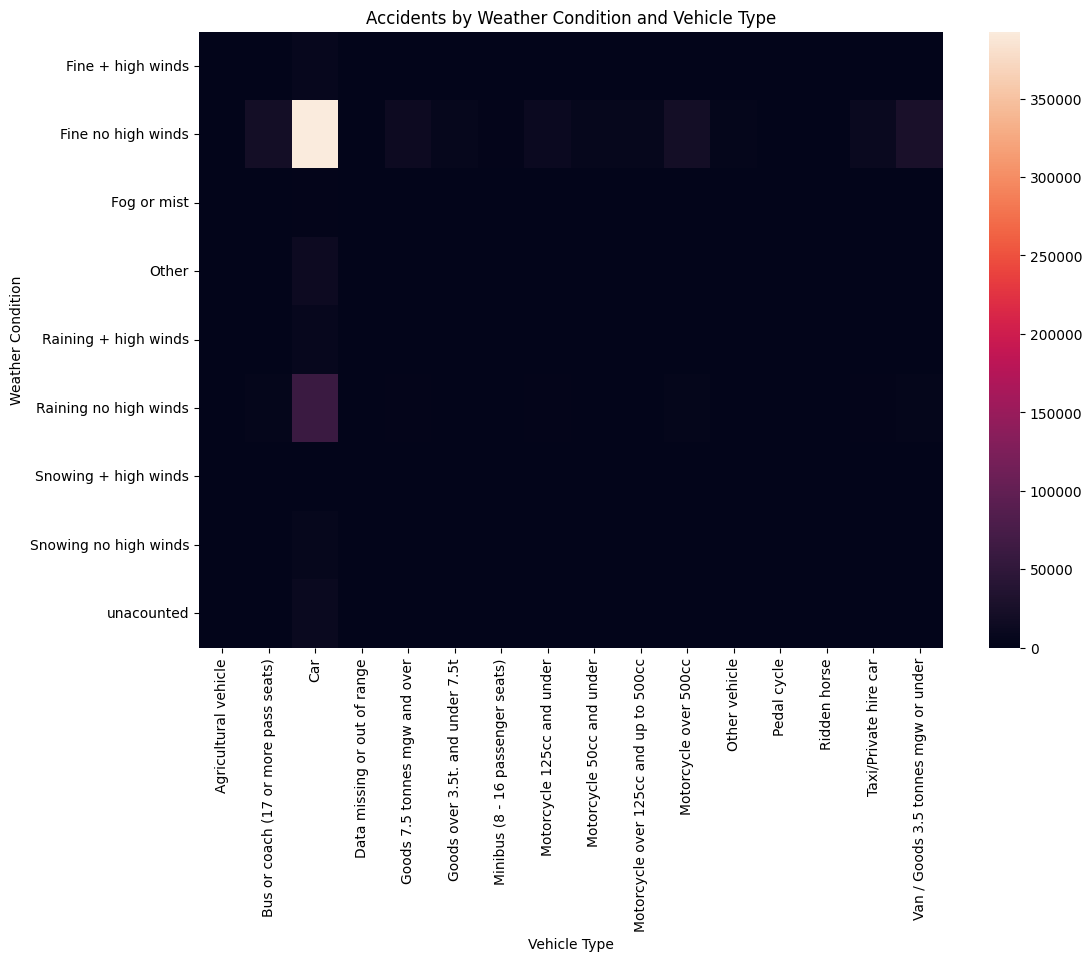

In [82]:
weather_vh = accident.groupby(['Weather_Conditions', 'Vehicle_Type']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(weather_vh)

plt.title('Accidents by Weather Condition and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Weather Condition')

plt.show()

<h1>17. Accidents by Road Surface Condition in year 2021</h1>

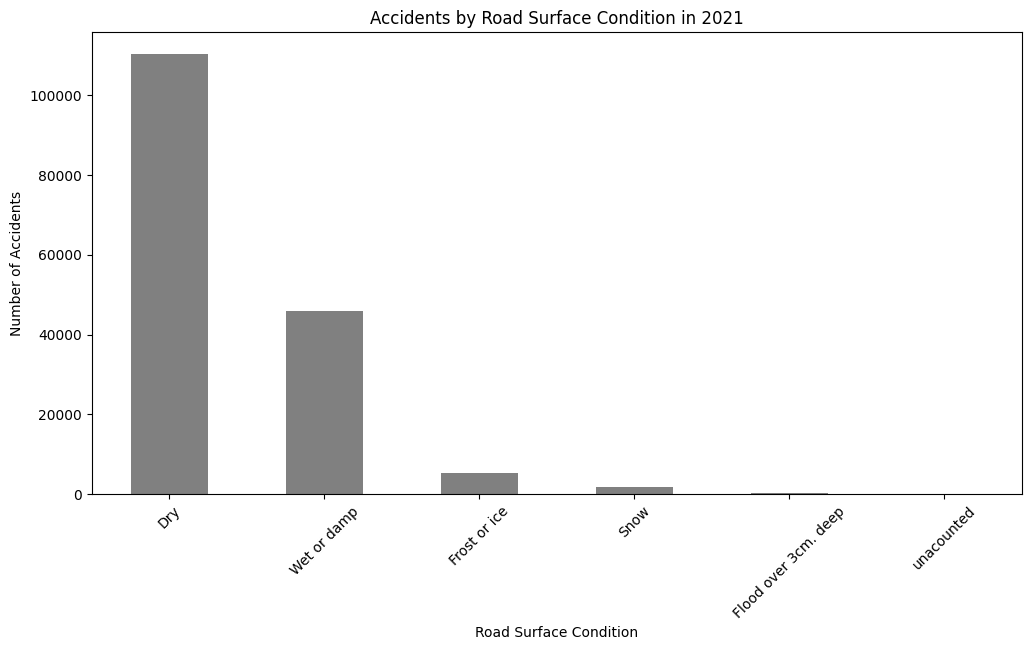

In [83]:
accidents_by_surface = df2021.groupby('Road_Surface_Conditions').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
accidents_by_surface.plot(kind='bar', color='gray')

plt.title('Accidents by Road Surface Condition in 2021')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.show()

<h1>18. Accidents by District Area in year 2021</h1>

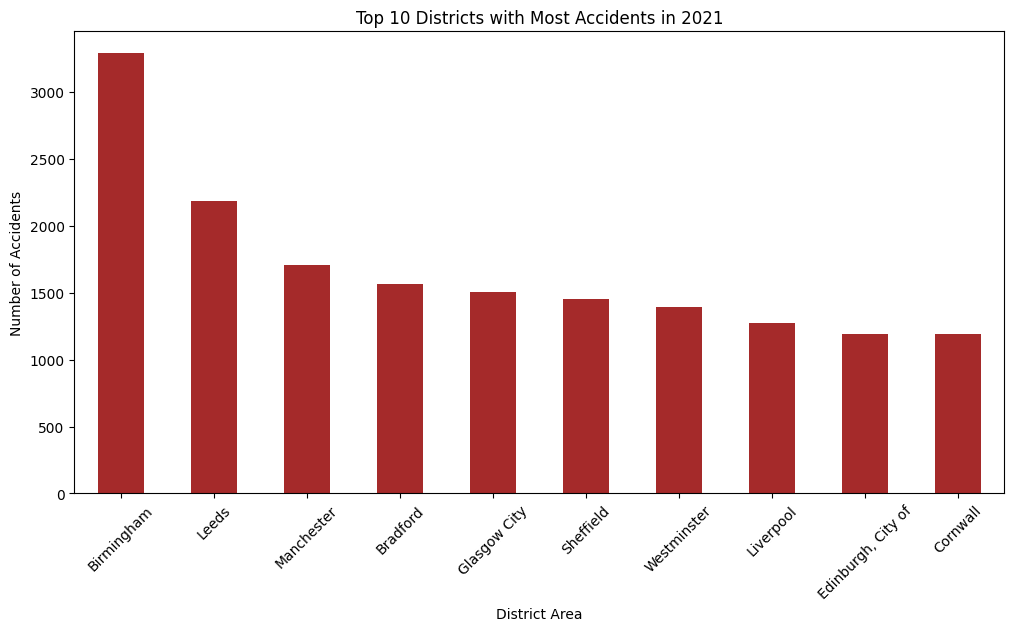

In [84]:
accidents_by_district = df2021.groupby('District Area').size().sort_values(ascending=False).head(10) 

plt.figure(figsize=(12, 6))
accidents_by_district.plot(kind='bar', color='brown')

plt.title('Top 10 Districts with Most Accidents in 2021')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.show()

<h1>19. How does the number of vehicles involved affect accident frequency in 2021?</h1>

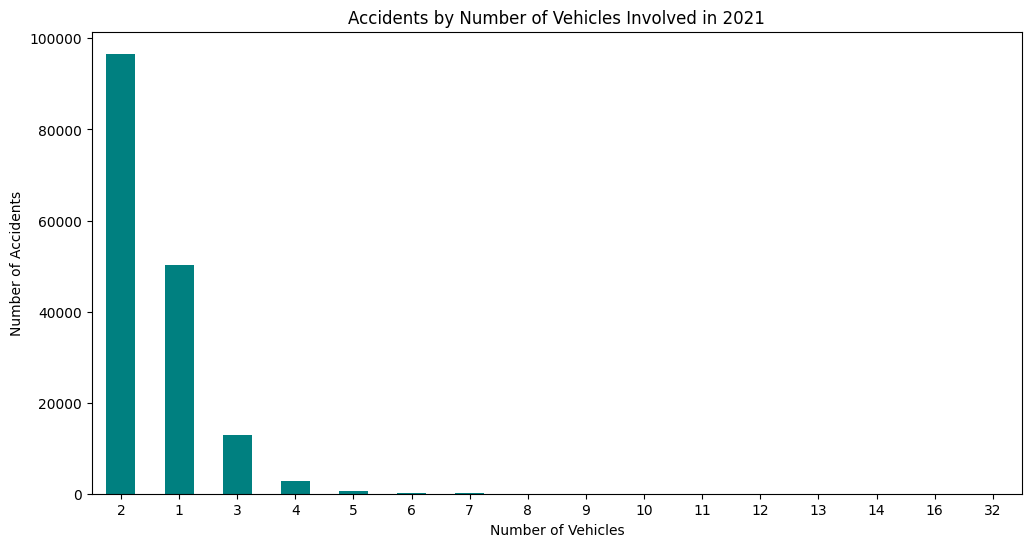

In [85]:
accidents_by_vehicles = df2021.groupby('Number_of_Vehicles').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
accidents_by_vehicles.plot(kind='bar', color='teal')

plt.title('Accidents by Number of Vehicles Involved in 2021')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

plt.show()

<h1>20. Accidents by Weather Condition Over the Years</h1>

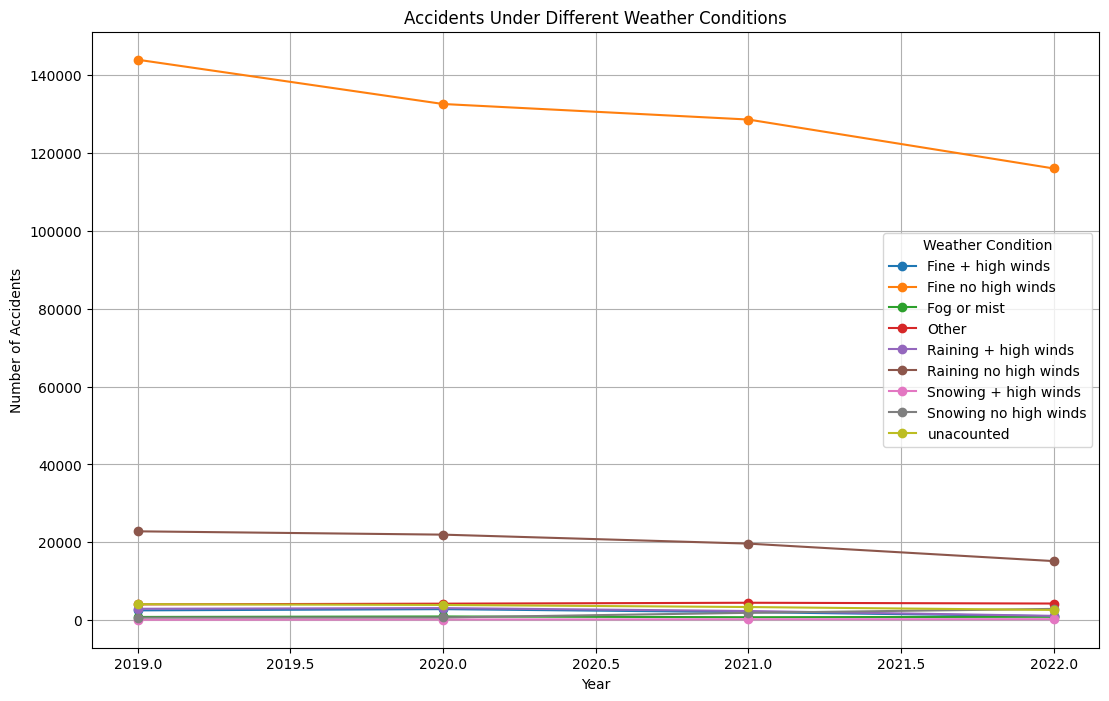

In [86]:
weather_year = accident.groupby(['Weather_Conditions', 'Year']).size().reset_index(name='Accident_Count')

pivot_table = weather_year.pivot(index='Year', columns='Weather_Conditions', values='Accident_Count')

count = 11  
for weather in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[weather], label=weather, marker='o')
    
    if count == 20: 
        break

# Chart styling
plt.gcf().set_size_inches(13, 8)
plt.title('Accidents Under Different Weather Conditions')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title="Weather Condition")
plt.grid(True)

plt.show()